In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os

In [2]:
os.chdir(r"C:\Users\Mark\Desktop\datasets\sleep")
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df = data.copy()
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df=df.drop("Person ID", axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [5]:
# Split the "Blood Pressure" column into two separate columns
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

df.drop(columns=['Blood Pressure'], inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [6]:
# Select columns with data type 'object' (categorical)
cat_col = df.select_dtypes(include=['object'])

cat_col.head()


,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,None
1,Male,Doctor,Normal,None
2,Male,Doctor,Normal,None
3,Male,Sales Representative,Obese,Sleep Apnea
4,Male,Sales Representative,Obese,Sleep Apnea


In [7]:
# Select columns with numeric data types
num_col = df.select_dtypes(include=['int64', 'float64'])

num_col.head()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,27,6.1,6,42,6,77,4200,126,83
1,28,6.2,6,60,8,75,10000,125,80
2,28,6.2,6,60,8,75,10000,125,80
3,28,5.9,4,30,8,85,3000,140,90
4,28,5.9,4,30,8,85,3000,140,90


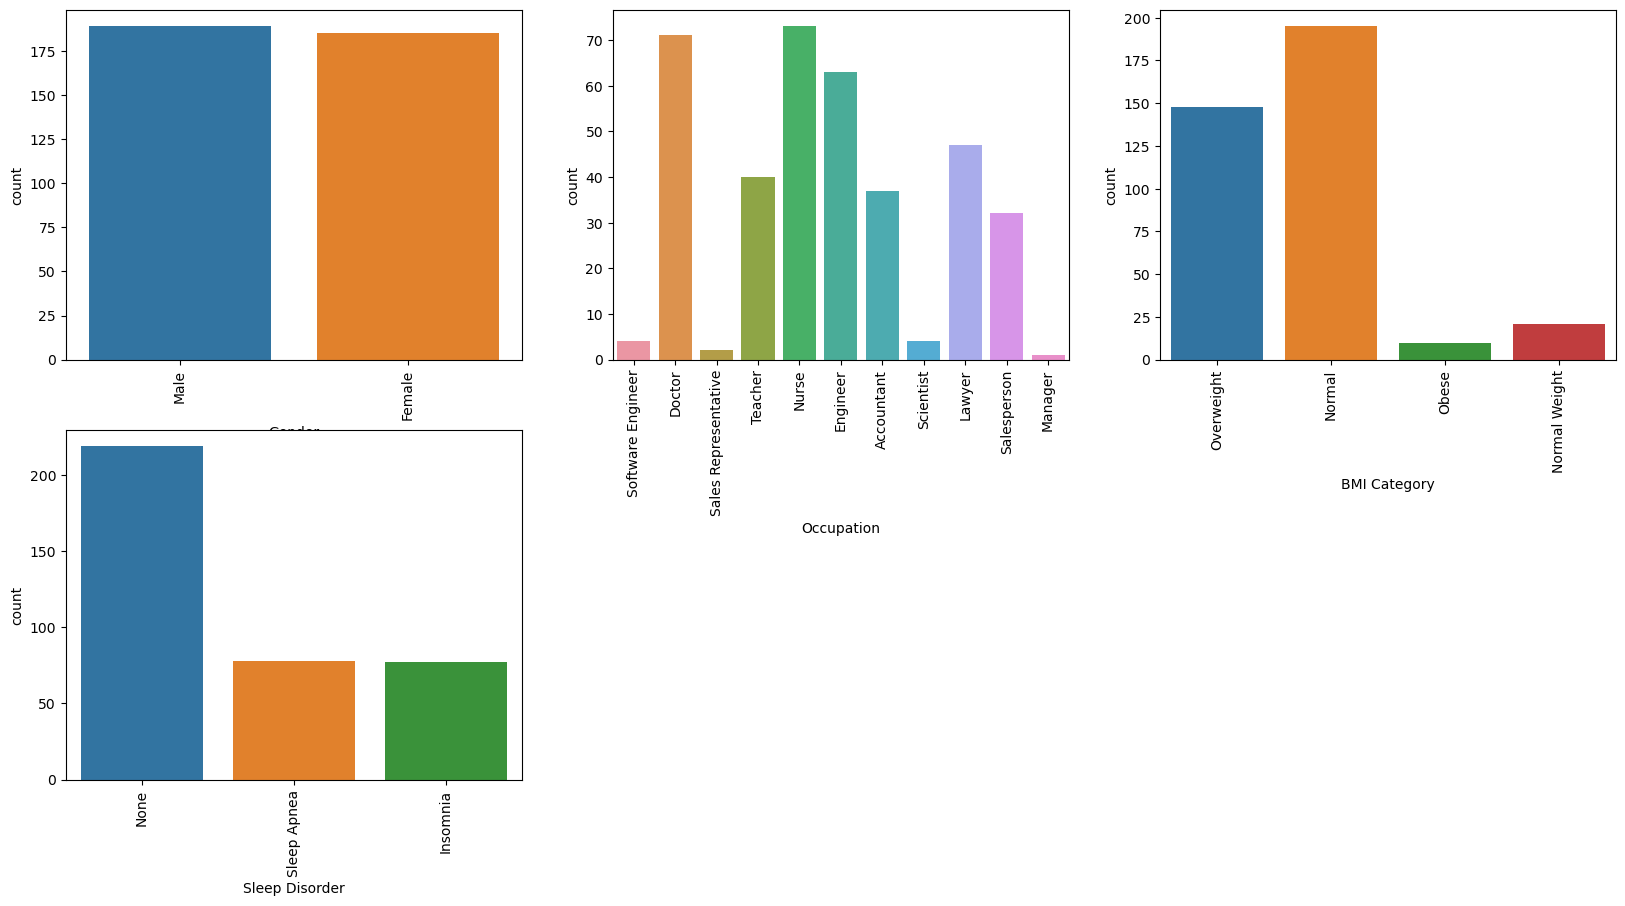

In [8]:
fig = plt.figure(figsize=(20, 10))

for i, var in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=var, data=cat_col)
    plt.xticks(rotation=90)

plt.show()

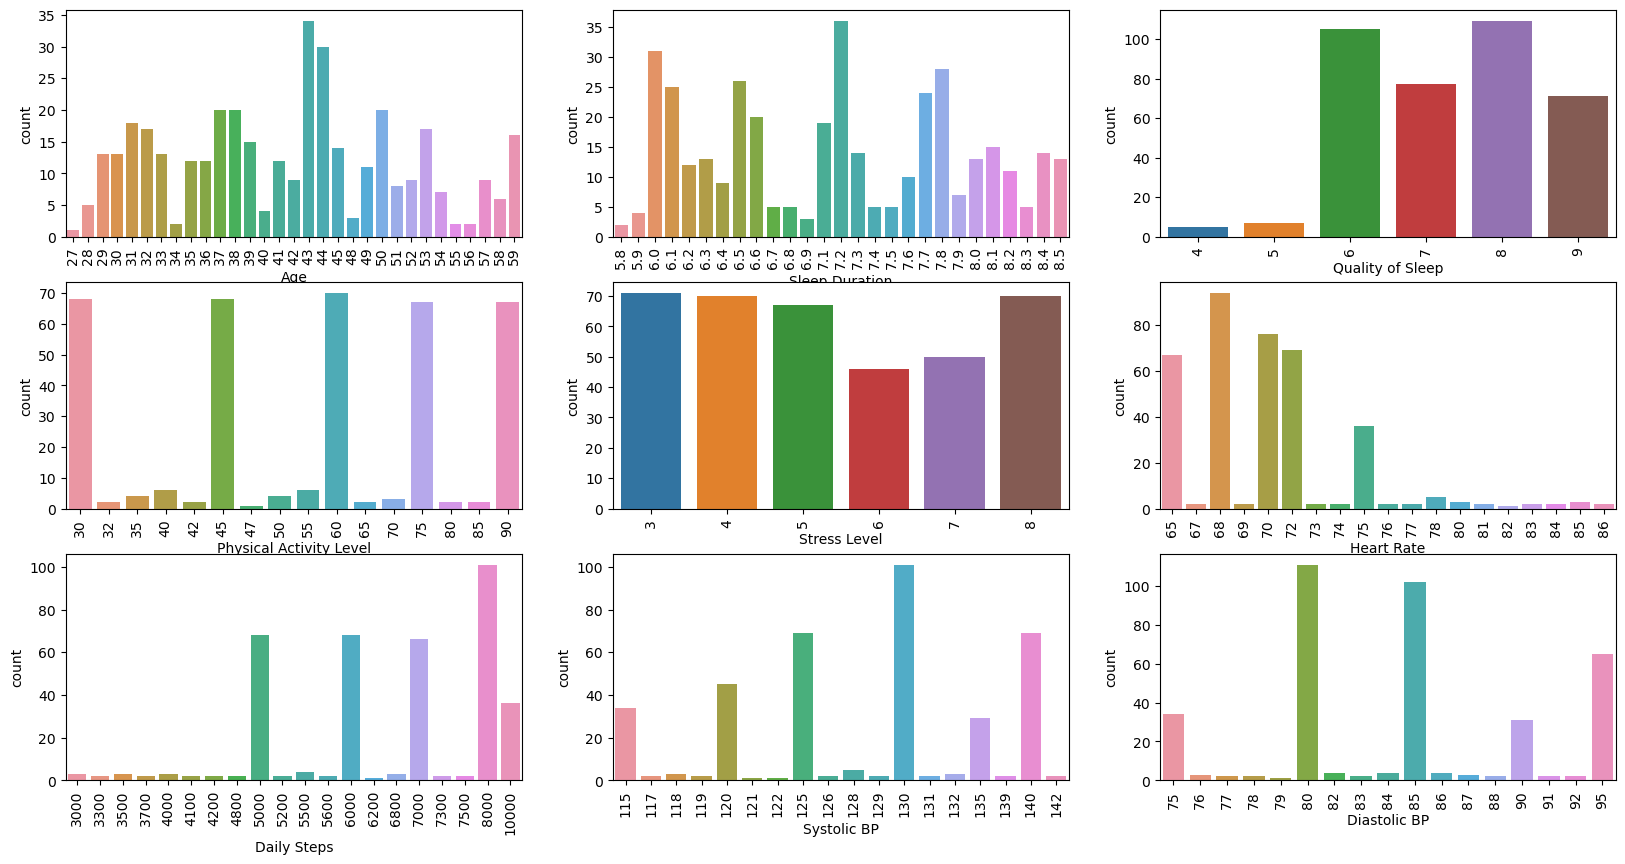

In [9]:
fig = plt.figure(figsize=(20, 10))

for i, var in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=var, data=num_col)
    plt.xticks(rotation=90)

plt.show()

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Systolic BP,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Diastolic BP,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


<AxesSubplot:>

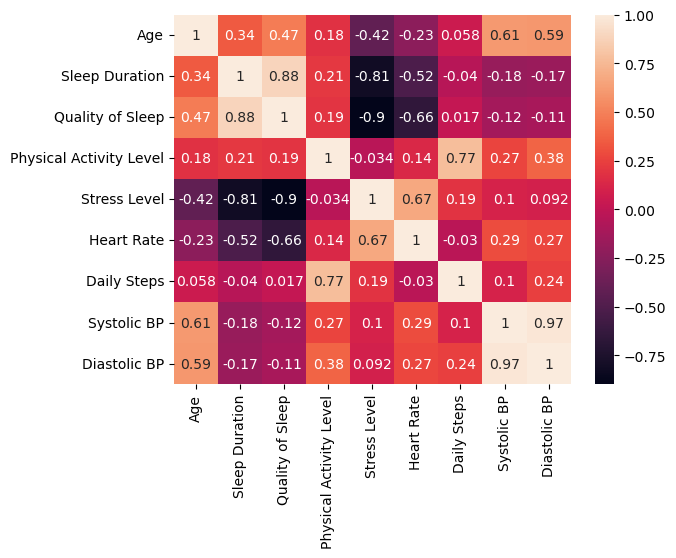

In [11]:
sns.heatmap(data=df.corr(),annot=True)

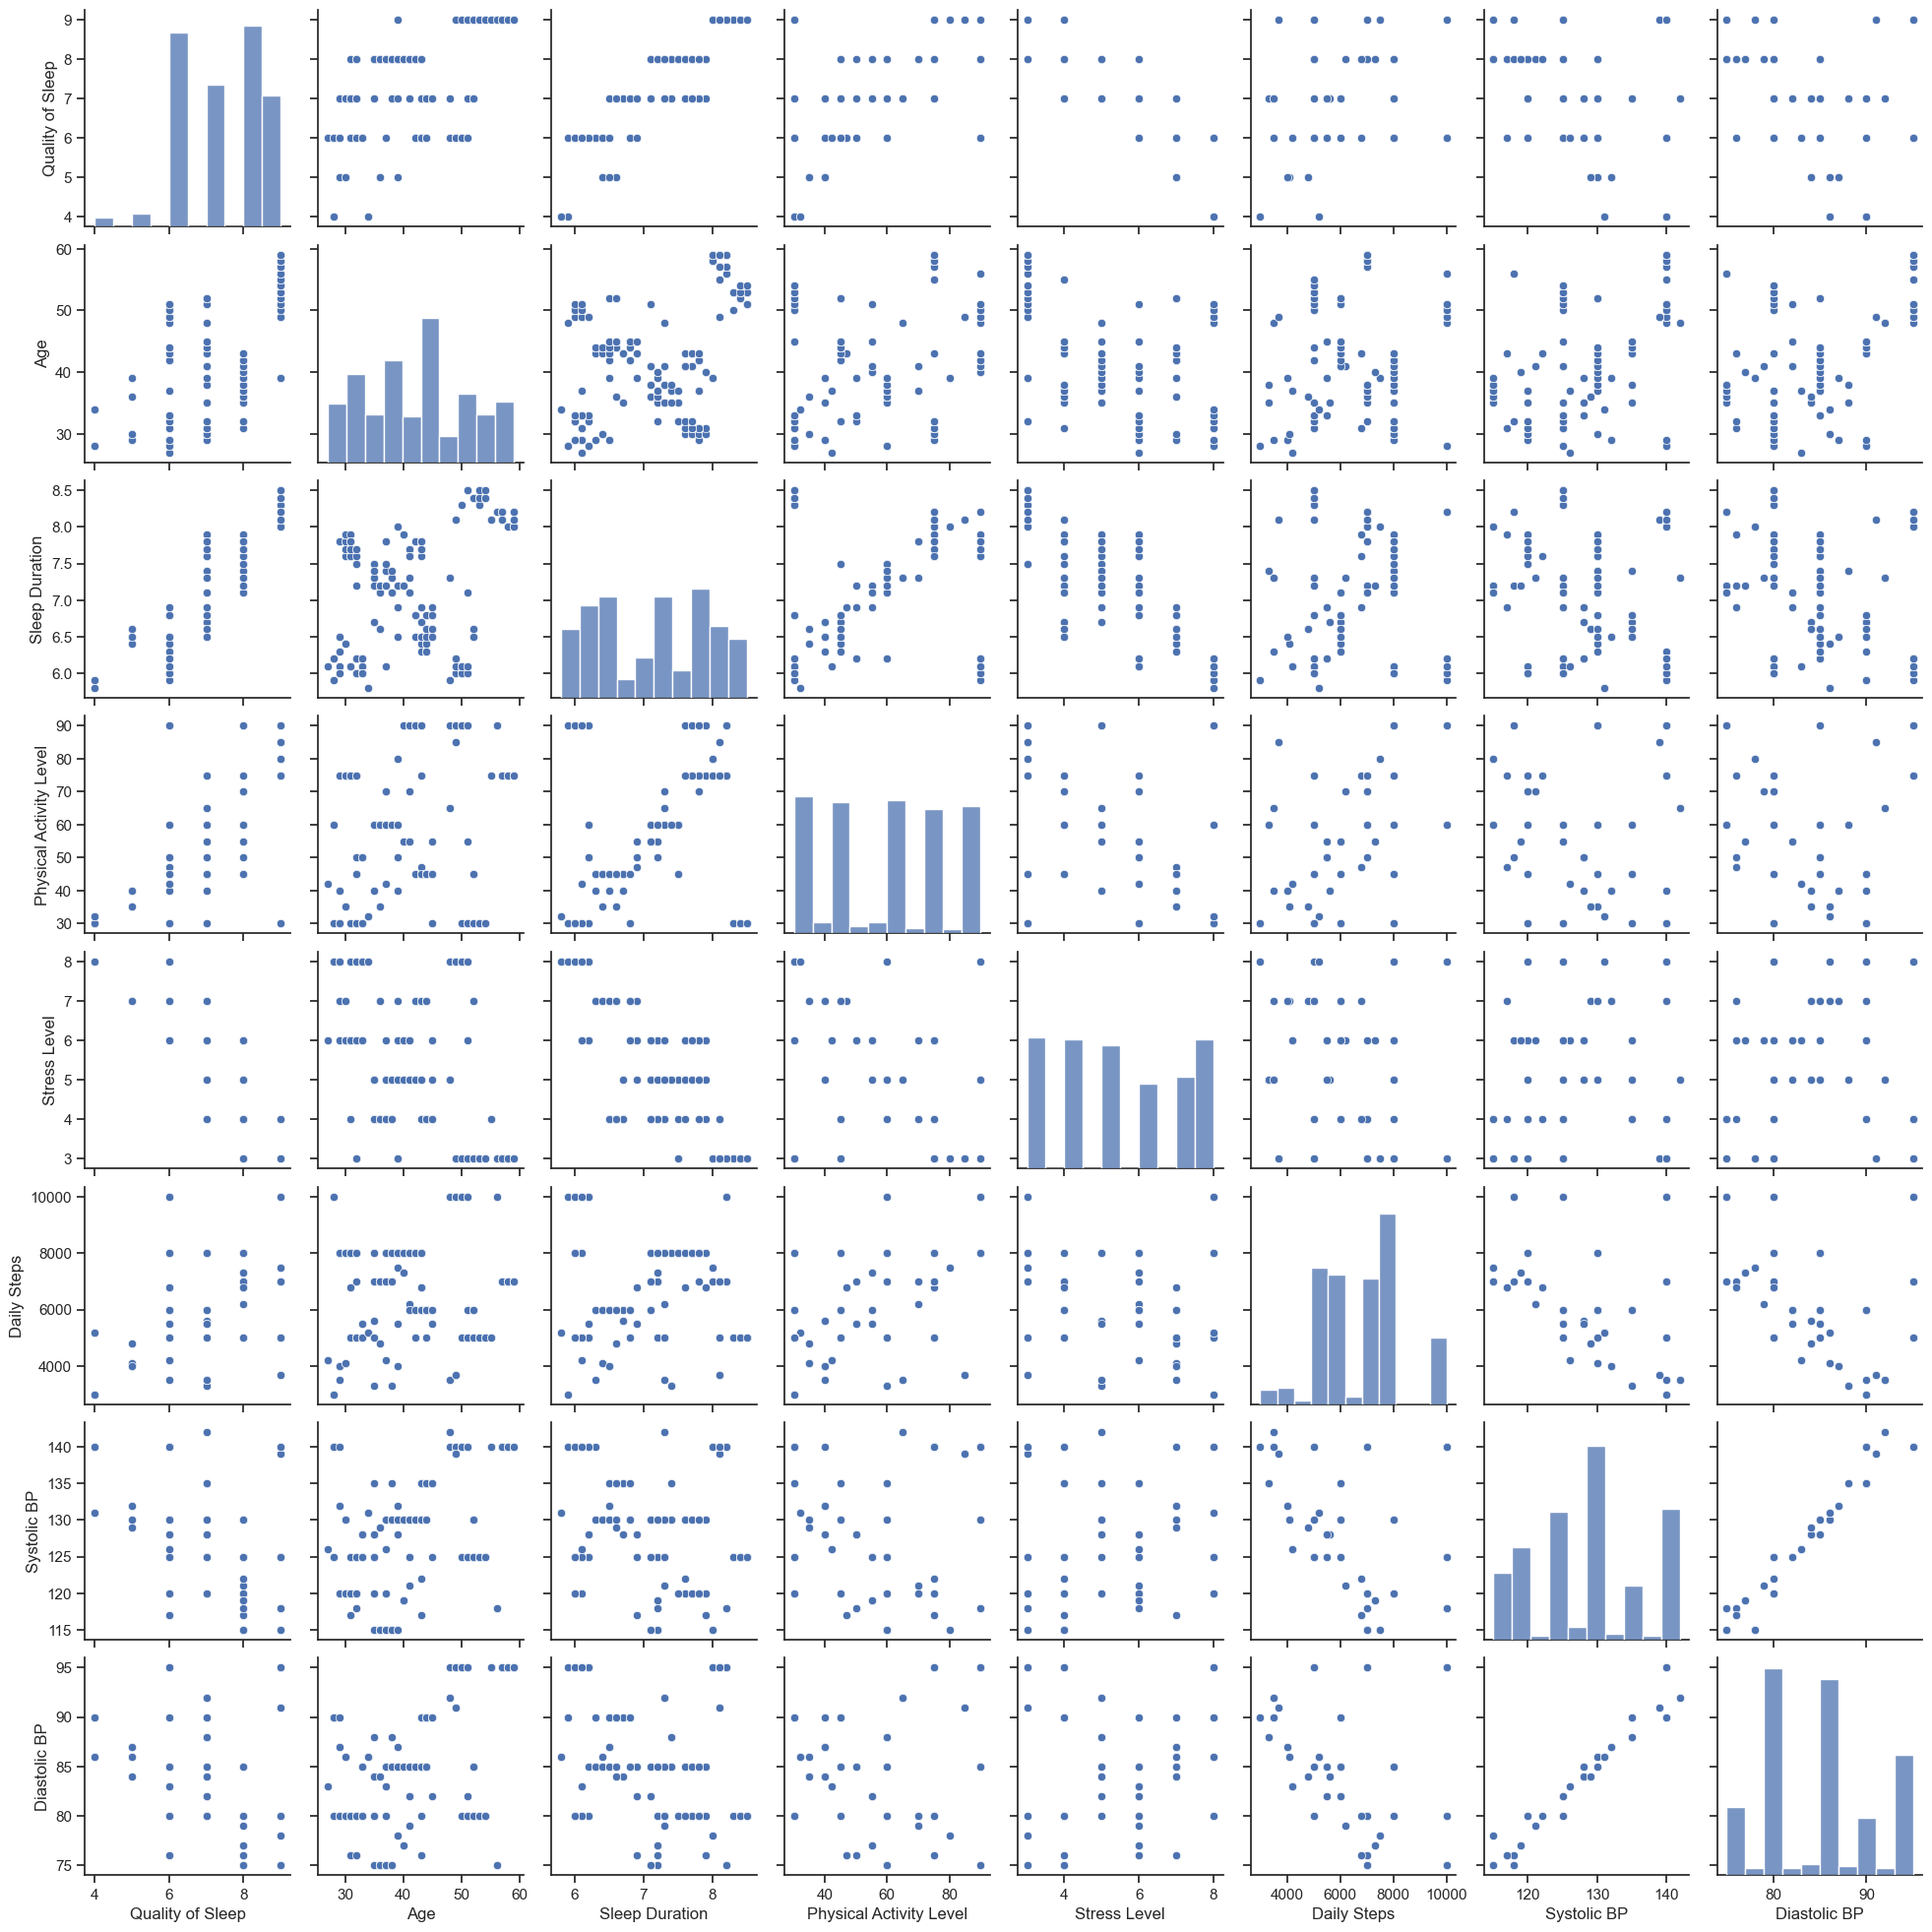

In [12]:
# Select a subset of columns for scatter plots
subset_columns = ['Quality of Sleep', 'Age', 'Sleep Duration', 'Physical Activity Level','Stress Level','Daily Steps',
                 'Systolic BP','Diastolic BP']

# Create scatter plots for every pair of columns
sns.set(style="ticks")
sns.pairplot(df[subset_columns])
plt.show()


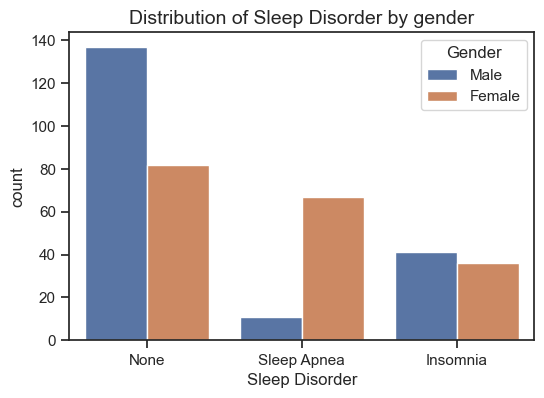

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue='Gender', x='Sleep Disorder')
plt.title('Distribution of Sleep Disorder by gender', fontsize=14)
plt.show()

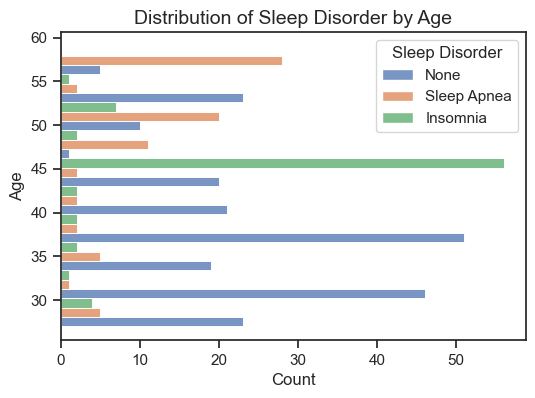

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, hue='Sleep Disorder', y='Age',
             multiple = "dodge")
plt.title('Distribution of Sleep Disorder by Age', fontsize=14)
plt.show()

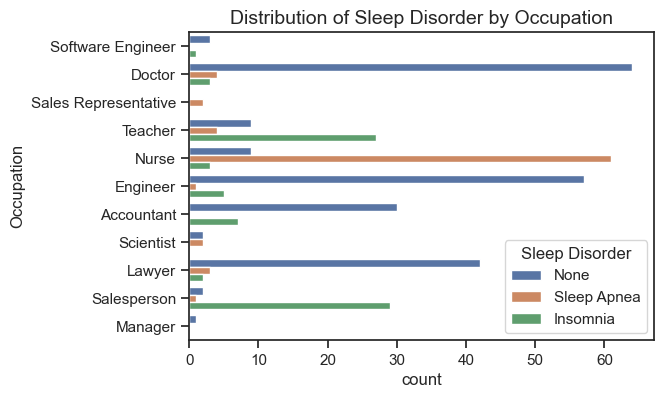

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue='Sleep Disorder', y='Occupation')
plt.title('Distribution of Sleep Disorder by Occupation', fontsize=14)
plt.show()

In [16]:
df['BMI Category'] = df['BMI Category'].replace({'Obese':'Overweight','Normal Weight':'Normal'})
df['BMI Category'].value_counts()

Normal        216
Overweight    158
Name: BMI Category, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
num_col_scaled = scaler.fit_transform(num_col)

# Create a DataFrame from scaled numerical features
num_col_scaled_df = pd.DataFrame(num_col_scaled, columns=num_col.columns)

# Display the scaled DataFrame
num_col_scaled_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode "Gender" column
gender_encoded = encoder.fit_transform(cat_col[["Gender"]])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(["Gender"]))

# Display the encoded DataFrame
gender_encoded_df.head()


,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [19]:
# Encode "Occupation" column
occupation_encoded = encoder.fit_transform(cat_col[["Occupation"]])
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(["Occupation"]))

# Display the encoded DataFrame
occupation_encoded_df.head()

,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Encode "BMI Category" column
bmi_encoded = encoder.fit_transform(df[["BMI Category"]])
bmi_encoded_df = pd.DataFrame(bmi_encoded, columns=encoder.get_feature_names_out(["BMI Category"]))

# Display the encoded DataFrame
bmi_encoded_df.head()

,BMI Category_Normal,BMI Category_Overweight
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [21]:
# Encode "Sleep Disorder" column
sleep_disorder_encoded = encoder.fit_transform(df[["Sleep Disorder"]])
sleep_disorder_encoded_df = pd.DataFrame(sleep_disorder_encoded, columns=encoder.get_feature_names_out(["Sleep Disorder"]))

# Display the encoded DataFrame
sleep_disorder_encoded_df.head()

,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [22]:
# Select columns with numeric data types (excluding boolean columns)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Reset the indices of the encoded DataFrames before concatenating
gender_encoded_df.reset_index(drop=True, inplace=True)
occupation_encoded_df.reset_index(drop=True, inplace=True)
bmi_encoded_df.reset_index(drop=True, inplace=True)
sleep_disorder_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the numeric columns DataFrame
df_encoded = pd.concat([num_col_scaled_df, gender_encoded_df, occupation_encoded_df, bmi_encoded_df, sleep_disorder_encoded_df], axis=1)

pd.set_option("display.max_columns", None)
df_encoded.head()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
# Define the target columns
target_columns = ['Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

# Select the target columns and assign them to the y variable
y = df_encoded[target_columns]

# Select the remaining columns as features (X)
X = df_encoded.drop(columns=target_columns)

# Display the shapes of X and y
print("Shape of X:", X.shape())
print("Shape of y:", y.shape())


TypeError: 'tuple' object is not callable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')